# Module 09: *k*-Nearest Neighbors

**Student Name**: Julia Knopp

**Date**: November 2, 2023

## Overview
The k-Nearest neighbor method is a type of instance based learning that uses existing data, with known labels, to predict the label for a new observation. The purpose of this exercise is to demonstrate the use of k-NN for classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 


## Instructions

#### Use the notebook: `k-NN.ipynb` to perform the following:
Question 1. Load and Inspect the data

Question 2. Perform the k-nn analysis using different values of k. Recommend which value is more appropriate and justify your response.

Question 3. Evaluate the prediction accuracy of the k-nn model.

Question 4. Explore different metrics and data partitioning strategies.


### Submission Instructions

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Question 1: Inspect the data
In this question you will need to load the data (this was performed for you), inspect the distribution and pairwise relationships between the features. 

In [60]:
#load the data from sklearn.datasets
data     = load_iris()

#divide the data into the input 'X' and the labels 'y'
X        = data['data'] #the observations
y        = data['target'] #the label

In [61]:
#load the data in a pandas dataframe
df          = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]

df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Question 1.1 (5 pts)
Obtain a statistical summary of the iris flowers sepal and petal features. Use the statistical summary, explain your observation about the iris flowers. Note: You can use the `describe()` function to display the statistical summary.

In [62]:
# use the describe method to obtain a statistical summary
df.describe(). round(2)

,sepal length,sepal width,petal length,petal width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### Explain Observations About Iris Flowers
Based on the statistical summary above, there are observations that can be made about the iris flowers. Looking at the mean values, it appears that the sepal values on average are greater than the petal measurements. Additionally, it appears that for both sepal and petal, the length is greater than the width on average.

When looking at the standard deviations, it appears that length varies more than width, as well as petals varying more than sepal; petal length has the highest standard deviation by far. 

Moving on to minimum values, it is interesting to see how much smaller the petal width is compared to the other measurements. The minimum petal width is 0.10 which appears very small in comparison to the smallest petal length of 1. Looking into this further, it appears that even the 25th percentile for petal width falls at 0.30, which is still fairly small.

When evaluating the maxiumum and minimum values, it appears that the measurements seem fairly consistent when comparing the measurements to the average. Something that does stand out to me is that the max petal length is greater than the maximum sepal width, but this makes sense considering the standard deviations mentioned earlier.

### Question 1.2 (10 pts)
Visualize and discuss the **distribution of each feature** and the **pairwise relationships between features**. Note: Ensure that you discuss the strength of the **correlation** between the features.

- Tip 1: the seaborn library has a pairplot visualization which is useful to display both the distribution of each feature and pairwise relationships.
- Tip 2: another useful visualization is called a correlation matrix. It can be used to visually display the strength of the correlation. 

Text(0.5, 1.05, 'Distribution of Each Feature')

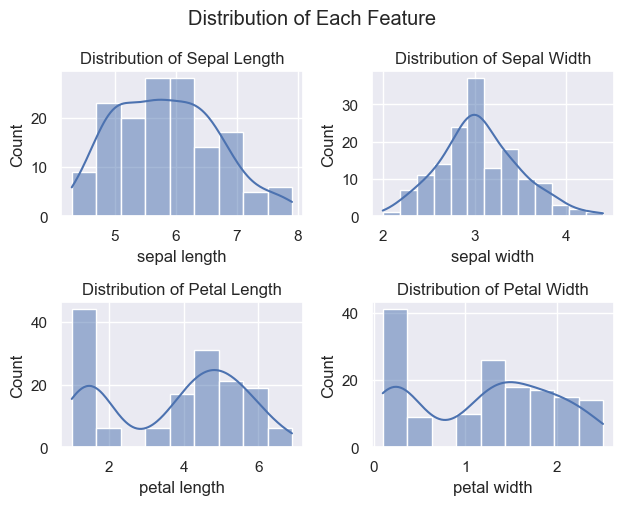

In [63]:
# create subplot for sepal length
plt.subplot(2, 2, 1)
sns.histplot(df['sepal length'], kde=True)
plt.title('Distribution of Sepal Length')

# create subplot for sepal width
plt.subplot(2, 2, 2)
sns.histplot(df['sepal width'], kde=True)
plt.title('Distribution of Sepal Width')

# create subplot for petal length
plt.subplot(2, 2, 3)
sns.histplot(df['petal length'], kde=True)
plt.title('Distribution of Petal Length')

# create subplot for petal width
plt.subplot(2, 2, 4)
sns.histplot(df['petal width'], kde=True)
plt.title('Distribution of Petal Width')

# organize the group of subplots and give them a name
plt.tight_layout()
plt.suptitle("Distribution of Each Feature", y=1.05)

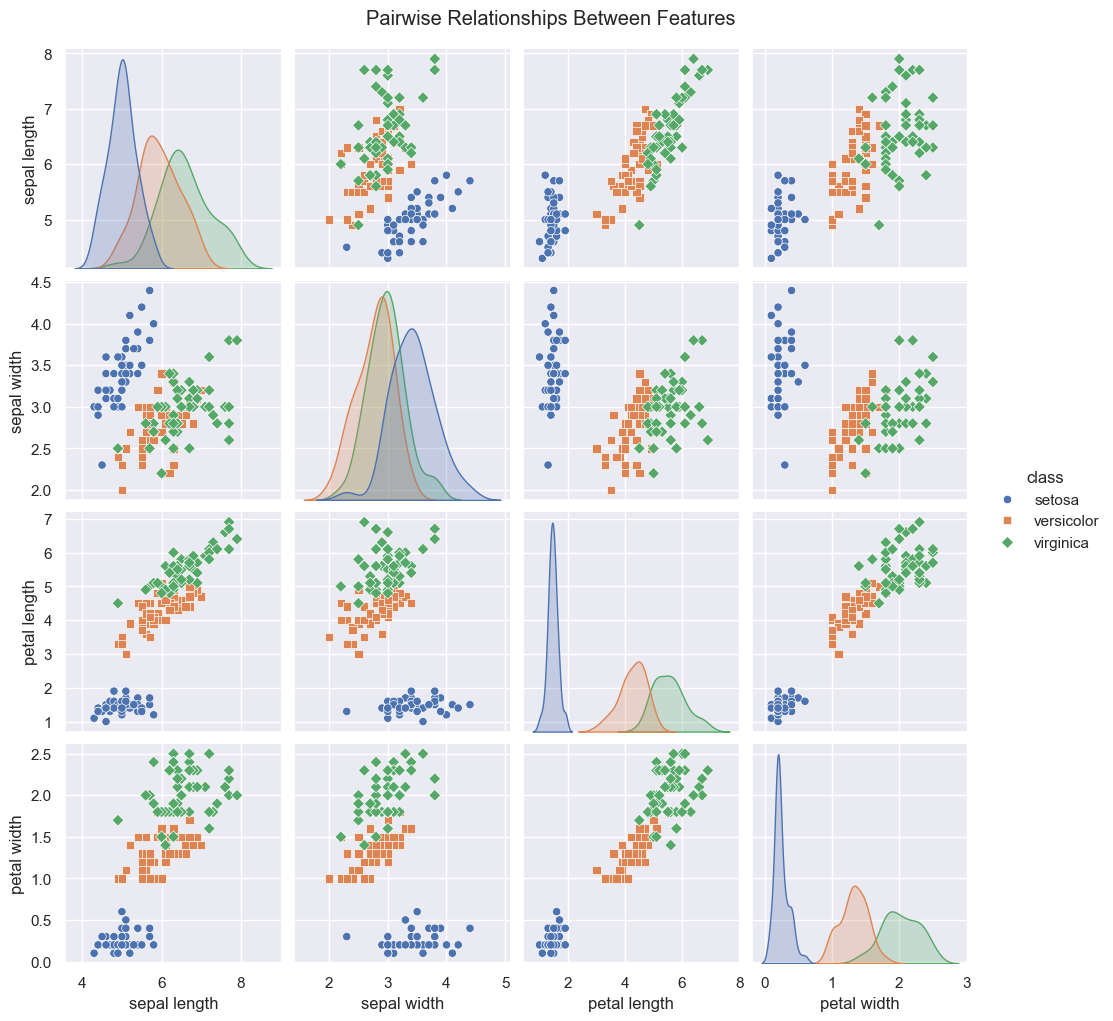

In [64]:
# visualize the pairwise relationships between features
sns.pairplot(df, hue='class', markers=["o", "s", "D"])
# give the plot a title
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
# show the plot
plt.show()

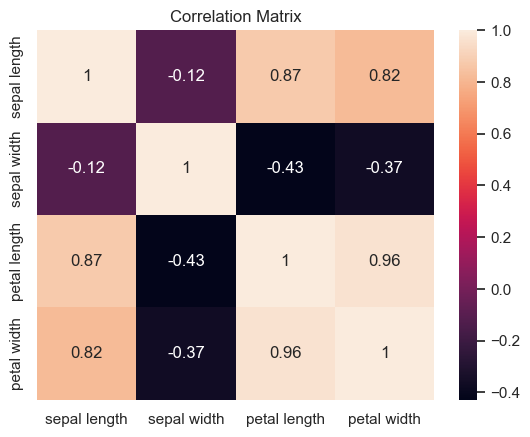

In [65]:
# create the correlation matrix
# exclude the class column before creating the matrix
correlation_matrix = df.drop(columns=['class']).corr()

# create a heatmap to display findings
sns.heatmap(correlation_matrix, annot=True)
# give the plot a title
plt.title("Correlation Matrix")
# show the plot
plt.show()

### Discuss Distributions and Relationships
From the graphs above, there are serveral things that can be discussed.

First off we can look at the individual distributions. For the sepal width and length meaurements the distributions both seem to be in the shape of a bell curve. For the petal length and width, however, the data seems to be more scattered and less uniform. For both petal width and petal length there are a large number of small values, if we exclude that data then the rest of the distribution looks fairly similar to the other distrbutions for sepal. A reason for this could be that there exist petals on flowers that are very small because they have just grown in.

Looking at the pairwise relationship graphs, there are observations that can be made regarding the relationships between the various measurements. Some strong, postive relationships that exist are 
1. sepal length and petal width
2. petal length and petal width
3. sepal length and petal length

On the other hand, a weak relationship that specifically stood out to me was sepal width and sepal length. In the graph it appears that the plot points are very non-uniform and don't seem to visualize any pattern.
Something interesting to note as well in these graphs is the different classes. Setosa seem to have a much lower petal length, petal width, and sepal length, followed by versicolor and then virginica. For sepal width, however, all species seem to have a similar distribution.

Lastly, when looking at the correlation matrix, our conclusions drawn from the pairwise relationship graphs can be further supported. The strong positive relationships that exist between variables are between petal length and petal width with +0.96, and slightly behind that is petal length and sepal length with +0.87. The closest correlation to zero, indicating the weakest, is sepal width and sepal length with -0.12.

## Question 2: Choose *K* (25 pts)

Using the cell below, build a model to predict the target in the iris dataset using the k-NN algorithm. The program should try at least 20 different values of k and evaluate the accuracy of the predictions. After which, display a line graph showing the accuracy for each value of k. Evaluate the results from the graph and recommend the best value of *k*. 

`Note:` If multiple values of *k* are found to be suitable, weigh the pros and cons of choosing a large versus a small value of *k*.

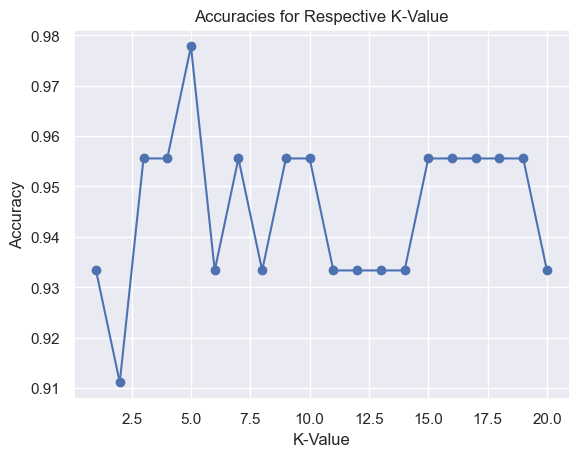

The best k-value to be recommended is 5 with an accuracy of 0.98


In [66]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, # the input features
                                                    y, # the label
                                                    test_size=0.3, # set aside 30% of the data as a test set
                                                    random_state=42, # reproduce the results
                                                    stratify=y # preserve the distribution of the labels
                                                   )

#build the k-nn model, experiment with different values of k and plot the results

# define k-values to be at least 20
k_values = range(1, 21)
# create an array to store their accuracies
accuracies = []

# loop through the different values of k and record their accuracies
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

# create a plot showing the k-values and their accuracies
plt.plot(k_values, accuracies, marker='o')
# give the plot a title
plt.title('Accuracies for Respective K-Value')
# label x axis
plt.xlabel('K-Value')
# label y-axis
plt.ylabel('Accuracy')
# show the plot
plt.show()

# find the highest accuracy in the set
best_accuracy = max(accuracies)
# find the best k-value based on where accuracy is the highest
best_k_value = k_values[accuracies.index(best_accuracy)]

# print findings
print('The best k-value to be recommended is', best_k_value, 'with an accuracy of', best_accuracy.round(2))

### Evaluating the Results
Based on the graph above, the recommended k-value of 5 makes sense because it is evident in the chart that this is where the accuracy is at its peak of 0.98, which is very accurate.

## Question 3: Evaluate the Results (5 pts)
Display the classification report for your recommended value of k. Evaluate the report and explain the results. 

In [67]:
# create a K-NN classifier with the best k-value
best_knn = KNeighborsClassifier(n_neighbors=best_k_value)

# fit the K-NN model on the training data
best_knn.fit(X_train, y_train)

# make predictions based on the test data
y_pred = best_knn.predict(X_test)

# define the class names as a list
class_names = ['setosa', 'versicolor', 'virginica']

# create a classification report
report = classification_report(y_test, y_pred, target_names=class_names)

# print the classification report
print("Classification Report for K-NN with k =", best_k_value)
print(report)

Classification Report for K-NN with k = 5
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Evaluate the Report and Explain the Results
When evaluating the model we can explain the results based on serveral observations. 

When looking at the precision column measuring the accuracy of positive predictions, we can see that for setosa and virginica it is 1.00, while versivolor is 0.94, indicating the results for precision are very accurate for all classes.

For recall, which measures how many positive instances were correctly identified, we can see that the accuracy is 1.00 for setosa and versicolor (meaning that all instances were correctly identified) and 0.93 for virginica, the results for recall also prove to be pretty accurate for all classes. 

The f1-score, measuring the balance between the precision and recall are 0.97 for virginica and versicolor and 1.00 (perfect) for setosa.

In the bottom section, all values are 0.98 which indicates a very high accuracy across the board.

## Question 4: Model Evaluation (5 pts)
Answer the following question using a markdown cell.

1. Research the difference between accuracy, precision, and recall. For each metric, provide an example that explains when you would choose one metric over the others.
2. In the lecture we discussed one method to partition your dataset using a train-test split. Identify another approach that can be used to partition your dataset and explain how it works.

`Note``: you do not need to implement code for questions 4.1 and 4.2

### Part 1
Accuracy is a metric that measures how often a machine learning model correctly predicts an outcome. Accuracy answers the question of: 'how often is the model right?' We would want to choose accuracy as a metric is if we want to find out how correct the model is when the classes are balanced. For example, if we want to see how effective a medication is at treating different strains of a disease, accuracy could be useful if there were roughly the same amount of patients with each strain to see how effective the medication is.

Precision is a metric that determines how often a learning model predicts the postive class, meaning this metric focuses on the postive predictions. Therefore, precision is valuable to use when the cost of false positives is high. An example of this could be diagnosing someone wrongfully with a serious disease, leading them to undergo unnecessary treatment which could be harmful.

Recall is a metric that measures how often a learning model correctly identifies true positive instances from all positives, in other words, the proportion of true positives out of all positive instances. Recall is essential in instances where missing postive instances is costly. An example of this is failing to indentify a diseased patient which could be costly.

### Part 2
Another approach that could be used to partition the dataset is a k-fold cross-validation. This is one way of splitting the dataset. The steps involved are as follows:
1. pick a number of folds (the number needs to be less than the length of the dataset
2. split the dataset into as equal parts as possible (folds)
3. choose k - 1 folds to be the training set, the remaining is the test set
4. train the model on the training set, on each iteration, a new model must be trained independently of the model trained on the previous iteration
5. validate on the test set
6. save the result of the validation
7. repeat steps 3-6 k times, using the remaining fold as the test set
8. average the results of all the validations to get the final value

The k-fold cross-validation is a reliable technique to use since training and testing are performed on several different parts of the dataset. By increasing the number of folds, we can test the model on many different sub-datasets.

## Resources / References
Share any resources that were helpful in your response for question 4. 

Part 1:
https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~:text=Accuracy%20shows%20how%20often%20a,when%20choosing%20the%20suitable%20metric.

Part 2:
https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right